# Transformada de Fourier 1D

Este IPython Notebook reproduz os exemplos apresentados por Jake Vanderplas em seu [blog](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/).

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams as rc
from scipy.fftpack import fft, ifft, fftfreq, fftshift, rfft, irfft

In [3]:
rc['lines.linewidth'] = 1.
rc['font.size'] = 14

### Funções para calcular a Transformada de Fourier 1D

In [4]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x. This 
    function was originally presented by Jake Vanderplas on his blog 
    (https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/)."""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

def iDFT_slow(x):
    """Compute the inverse discrete Fourier Transform of the 1D 
    array x."""
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)
    M /= N
    return np.dot(M, x)

### Input

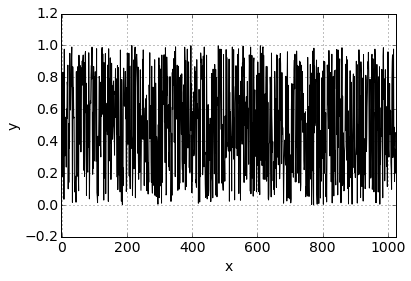

In [5]:
#Sinal
y = np.random.random(1024)

#Coordenadas
x = np.arange(0.,1024.,1)

plt.figure()
plt.plot(x, y, 'k-', linewidth=1.)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 1025)
plt.ylim(-0.2, 1.2)
plt.show()

### Resultados das funções

In [6]:
slow = DFT_slow(y)

### Resultado produzido pela FFT do Scipy

In [7]:
FFT_scipy = fft(y)

### Validação

In [8]:
np.allclose(slow, FFT_scipy)

True

### Comparação do tempo de execução

In [9]:
%timeit DFT_slow(y)
%timeit fft(y)

10 loops, best of 3: 82.4 ms per loop
100000 loops, best of 3: 11.8 µs per loop


### Exemplo de Transformada de Fourier 1D

Este exemplo foi retirado da [documentação do Scipy](http://docs.scipy.org/doc/scipy-dev/reference/tutorial/fftpack.html).

In [10]:
# Número de amostras
N = 2**8
# Intervalo de amostragem
T = 1.0 / 800.0
# Coordenadas do sinal
x = np.linspace(0.0, N*T, N)

In [26]:
print 'N = %d' % N
print 'T = %f' % T

N = 256
T = 0.001250


$y = \sin(50 \; 2\pi \; x) + \frac{1}{2} \, \sin(100 \; 2\pi \; x)$

In [11]:
y1 = np.sin(50.0 * 2.0*np.pi*x) 
y2 = 1.5*np.sin(100.0 * 2.0*np.pi*x)
y = y1 + y2

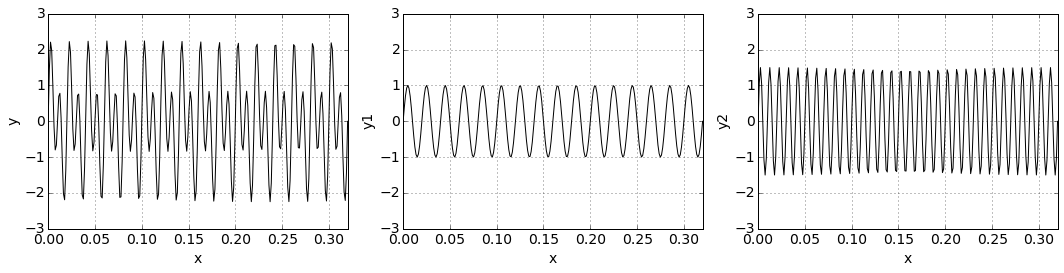

In [12]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(x, y, 'k-')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x.min(), x.max())
plt.ylim(-3, 3)

plt.subplot(1,3,2)
plt.plot(x, y1, 'k-')
plt.grid()
plt.xlabel('x')
plt.ylabel('y1')
plt.xlim(x.min(), x.max())
plt.ylim(-3, 3)

plt.subplot(1,3,3)
plt.plot(x, y2, 'k-')
plt.grid()
plt.xlabel('x')
plt.ylabel('y2')
plt.xlim(x.min(), x.max())
plt.ylim(-3, 3)

plt.tight_layout()

plt.show()

In [13]:
# Transformada de Fourier 1D
Y = fft(y) # Scipy
Y_slow = DFT_slow(y) # Slow

In [14]:
# Espectro de amplitude
Y_amp = 2.0/N * np.abs(Y)
Y_slow_amp = 2.0/N * np.abs(Y_slow)

In [15]:
# Frequência crítica de Nyquist
fn = 1./(2.*T)
# Frequências
f = fftfreq(N, T)

In [20]:
print 'fn = %.3f' % fn

fn = 400.000


In [27]:
f

array([   0.   ,    3.125,    6.25 ,    9.375,   12.5  ,   15.625,
         18.75 ,   21.875,   25.   ,   28.125,   31.25 ,   34.375,
         37.5  ,   40.625,   43.75 ,   46.875,   50.   ,   53.125,
         56.25 ,   59.375,   62.5  ,   65.625,   68.75 ,   71.875,
         75.   ,   78.125,   81.25 ,   84.375,   87.5  ,   90.625,
         93.75 ,   96.875,  100.   ,  103.125,  106.25 ,  109.375,
        112.5  ,  115.625,  118.75 ,  121.875,  125.   ,  128.125,
        131.25 ,  134.375,  137.5  ,  140.625,  143.75 ,  146.875,
        150.   ,  153.125,  156.25 ,  159.375,  162.5  ,  165.625,
        168.75 ,  171.875,  175.   ,  178.125,  181.25 ,  184.375,
        187.5  ,  190.625,  193.75 ,  196.875,  200.   ,  203.125,
        206.25 ,  209.375,  212.5  ,  215.625,  218.75 ,  221.875,
        225.   ,  228.125,  231.25 ,  234.375,  237.5  ,  240.625,
        243.75 ,  246.875,  250.   ,  253.125,  256.25 ,  259.375,
        262.5  ,  265.625,  268.75 ,  271.875,  275.   ,  278.

In [35]:
fftshift(f)

array([-400.   , -396.875, -393.75 , -390.625, -387.5  , -384.375,
       -381.25 , -378.125, -375.   , -371.875, -368.75 , -365.625,
       -362.5  , -359.375, -356.25 , -353.125, -350.   , -346.875,
       -343.75 , -340.625, -337.5  , -334.375, -331.25 , -328.125,
       -325.   , -321.875, -318.75 , -315.625, -312.5  , -309.375,
       -306.25 , -303.125, -300.   , -296.875, -293.75 , -290.625,
       -287.5  , -284.375, -281.25 , -278.125, -275.   , -271.875,
       -268.75 , -265.625, -262.5  , -259.375, -256.25 , -253.125,
       -250.   , -246.875, -243.75 , -240.625, -237.5  , -234.375,
       -231.25 , -228.125, -225.   , -221.875, -218.75 , -215.625,
       -212.5  , -209.375, -206.25 , -203.125, -200.   , -196.875,
       -193.75 , -190.625, -187.5  , -184.375, -181.25 , -178.125,
       -175.   , -171.875, -168.75 , -165.625, -162.5  , -159.375,
       -156.25 , -153.125, -150.   , -146.875, -143.75 , -140.625,
       -137.5  , -134.375, -131.25 , -128.125, -125.   , -121.

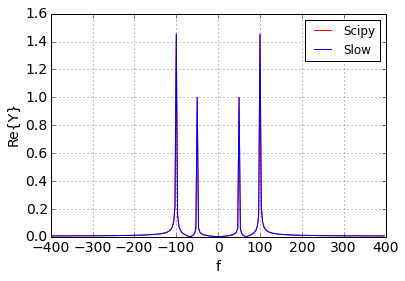

In [36]:
plt.figure()
plt.plot(fftshift(f), fftshift(Y_amp).real, 'r-', label='Scipy')
plt.plot(fftshift(f), fftshift(Y_slow_amp).real, 'b-', label='Slow')
plt.grid()
plt.xlabel('f')
plt.ylabel('Re{Y}')
plt.legend(loc='best', fontsize=12)
plt.show()

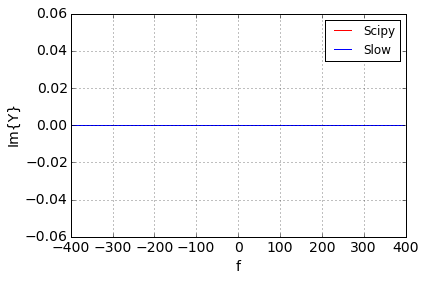

In [38]:
plt.figure()
plt.plot(fftshift(f), fftshift(Y_amp).imag, 'r-', label='Scipy')
plt.plot(fftshift(f), fftshift(Y_slow_amp).imag, 'b-', label='Slow')
plt.grid()
plt.xlabel('f')
plt.ylabel('Im{Y}')
plt.legend(loc='best', fontsize=12)
plt.show()

### Exemplo de Transformada Inversa de Fourier 1D

In [ ]:
# Transformada de Fourier 1D
y_estimado = ifft(Y) # Scipy

In [ ]:
plt.figure()
plt.plot(x, y, 'r-', label='Original')
plt.plot(x, y_estimado, 'b-', label='Scipy')
plt.grid()
plt.legend(loc='best', fontsize=12)
plt.show()

### Exemplo de Transformada de Fourier 1D 2

Este exemplo foi retirado do livro do Brigham (1988), example 2.1, p. 10.

* Brigham, E. O., 1988, The Fast Fourier Transform and its applications, Prentice Hall, New Jersey, ISBN 0-13-307505-2 


**Resultados analíticos**

In [ ]:
# Número de amostras
N = 2**11

# Fator de normalização
norm = 1./np.sqrt(N)

# limite inferior e superior da variável y
ymin = 0.0
ymax = 40.0

# Intervalo de amostragem
T = (ymax - ymin)/(N-1)

In [ ]:
# Frequência crítica de Nyquist
fn = 1./(2.*T)
# Frequências da primeira metade do espectro
f = fftfreq(N, T)

In [ ]:
print 'N = %d' % N
print 'fmin = %10.5f | fmax = %10.5f' % (np.min(f), np.max(f))

In [ ]:
y = np.linspace(ymin, ymax, N)

alfa = 1.0
beta = 1.0

g = beta*np.exp(-alfa*y)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y, g, 'r-', label='Analitico')
plt.grid()
plt.legend(loc='best', fontsize=12)
plt.xlabel('y', fontsize=16)
plt.ylabel('g(y)', fontsize=16)
plt.show()

In [ ]:
ReG = alfa*beta/(alfa**2 + (2.*np.pi*f)**2)
ImG = -2.*np.pi*f*beta/(alfa**2 + (2.*np.pi*f)**2)
G = ReG + (0.+1.j)*ImG
AmpG = np.abs(G)
#F = np.arctan2(ImG,ReG)
#F = np.arctan2(-2.*np.pi*f,alfa)
F = np.angle(G)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(fftshift(f), fftshift(ReG), 'r-', label='Re{G(f)}')
plt.plot(fftshift(f), fftshift(ImG), 'b-', label='Im{G(f)}')
plt.grid()
plt.legend(loc='best', fontsize=12)
plt.xlabel('f', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(fftshift(f), fftshift(AmpG), 'r-', label='Espec. Amplitude')
plt.plot(fftshift(f), fftshift(F), 'b-', label='Espec. Fase')
plt.grid()
plt.legend(loc='best', fontsize=12)
plt.xlabel('f', fontsize=16)
plt.show()

In [ ]:
G_Scipy = fft(g)
#G_Scipy = rfft(g)

In [ ]:
ReG_Scipy = np.real(G_Scipy)
ImG_Scipy = np.imag(G_Scipy)
AmpG_Scipy = np.abs(G_Scipy)
#F_Scipy = np.arctan2(ImG_Scipy,ReG_Scipy)
F_Scipy = np.angle(G_Scipy)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(fftshift(f), fftshift(ReG), 'r-', label='Re{G(f)}')
plt.plot(fftshift(f), norm*fftshift(ReG_Scipy), 'r.', label='Re{G(f)} Scipy')
plt.plot(fftshift(f), fftshift(ImG), 'b-', label='Im{G(f)}')
plt.plot(fftshift(f), norm*fftshift(ImG_Scipy), 'b.', label='Im{G(f)} Scipy')
plt.grid()
plt.legend(loc='best', fontsize=12)
plt.xlabel('f', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(fftshift(f), fftshift(AmpG), 'r-', label='Espec. Amplitude')
plt.plot(fftshift(f), norm*fftshift(AmpG_Scipy), 'r.', label='Espec. Amplitude Scipy')
plt.plot(fftshift(f), fftshift(F), 'b-', label='Espec. Fase')
plt.plot(fftshift(f), fftshift(F_Scipy), 'b.', label='Espec. Fase Scipy')
plt.grid()
plt.legend(loc='best', fontsize=12)
plt.xlabel('f', fontsize=16)
plt.show()

In [ ]:
g_Scipy = ifft(G_Scipy)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y, g, 'r-', label='Analitico')
plt.plot(y, g_Scipy, 'r.', label='Scipy')
plt.grid()
plt.legend(loc='best', fontsize=12)
plt.xlabel('y', fontsize=16)
plt.ylabel('g(y)', fontsize=16)
plt.show()